# Data Analysis Examples

## 13.1 Bitly Data from 1.USA.gov

In [238]:
# data đầu vào
path = "example.txt"

In [239]:
# đọc file và in dòng đầu tiên
with open(path) as f:
    print(f.readline())

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [240]:
# đọc file và lưu vào list records
import json
with open(path) as f:
    records = [json.loads(line) for line in f]

In [241]:
# in ra bản ghi đầu tiên
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

### Counting Time Zones in Pure Python

In [242]:
# Lấy danh sách các múi giờ từ records
# Một số record có thể không có khóa 'tz' → dễ gây lỗi KeyError
# time_zones = [rec["tz"] for rec in records]

In [243]:
# Hiển thị 10 múi giờ đầu tiên
time_zones = [rec["tz"] for rec in records if "tz" in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [244]:
# đém số timezone 1
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [245]:
# đém số timezone 2
from collections import defaultdict

from sympy import sequence
def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [246]:
# Đếm số muối giờ của America/New_York
counts = get_counts(time_zones)
counts["America/New_York"]

1251

In [247]:
# dem toan bo gia tri cua timezone
len(time_zones)

3440

In [248]:
# Hàm hiển thị 10 múi giờ phổ biến nhất
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [249]:
# Hiển thị 10 múi giờ phổ biến nhất
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [250]:
# có các khác để hiển thi 10 múi giờ phổ biến nhất là dùng thư viện collections
from collections import Counter

In [251]:
# Đếm số muối giờ của timezone
counts = Counter(time_zones)

In [252]:
# Hiển thị 10 múi giờ phổ biến nhất bằng thư viện collections
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### Counting Time Zones with pandas

In [253]:
import pandas as pd
# chuyển records thành dataframe
frame = pd.DataFrame(records)

In [254]:
# hiển thị thông tin dataframe
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [255]:
# hiển thị các dòng đầu tiên của cột tz
frame["tz"].head()

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

In [256]:
# đếm số các giá trị trong cột tz
tz_counts = frame["tz"].value_counts()
# hiển thì giá trị đếm được của các dòng đầu tiên
tz_counts.head()

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

In [257]:
# Xử lý giá trị thiếu trong cột tz
clean_tz = frame["tz"].fillna("Missing")
clean_tz[clean_tz == ""] = "Unknown"

In [258]:
# đếm lại các giá tri trong cột tz sau khi đã xử lý giá trị thiếu
tz_counts = clean_tz.value_counts()
tz_counts.head()

tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

In [259]:
# Vẽ biểu đồ
import seaborn as sns

In [260]:
# Lấy ra 5 giá trị hàng đầu
subset = tz_counts.head()

<Axes: ylabel='tz'>

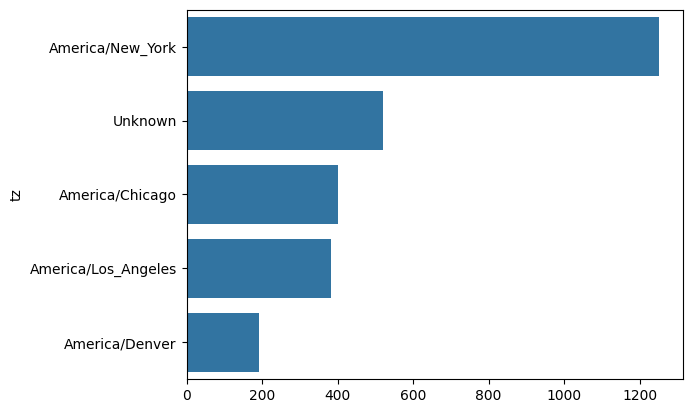

In [261]:
# Vẽ biểu đồ thanh ngang
sns.barplot(y=subset.index, x=subset.to_numpy())

In [262]:
# Hiển thị giá trị của cột a tại dòng 1
frame["a"][1]

'GoogleMaps/RochesterNY'

In [263]:
# Hiển thị giá trị của cột a tại dòng 50
frame["a"][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [264]:
# Hiển thị giá trị của cột a tại dòng 51 và 50 giá trị đầu tiên
frame["a"][51][:50]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [265]:
# Tách chuỗi và lấy ra tên trình duyệt
results = pd.Series([x.split()[0] for x in frame["a"].dropna()])

In [266]:
# Hiển thị 5 giá trị đầu tiên
results.head(5)

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [267]:
# Hiển thị các trình duyệt phổ biến nhất
results.value_counts().head(8)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Name: count, dtype: int64

In [268]:
# Lọc bỏ các giá trị thiếu trong cột a
cframe = frame[frame["a"].notna()].copy()

In [269]:
# Thêm cột os vào cframe
import numpy as np
cframe["os"] = np.where(cframe["a"].str.contains("Windows"), "Windows", "Not Windows")

In [270]:
# Hiển thị 5 giá trị đầu tiên của cột os
cframe["os"].head(5)

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [271]:
# Đếm số lượng người dùng theo múi giờ và hệ điều hành
by_tz_os = cframe.groupby(["tz", "os"])

In [272]:
# Tạo bảng tổng hợp
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [273]:
# Sắp xếp theo số lượng người dùng
indexer = agg_counts.sum("columns").argsort()

In [274]:
# Lấy 10 giá trị đầu tiên của chỉ số
indexer.values[:10]

array([ 2,  7,  5,  4, 14, 11,  9,  8, 24, 26])

In [275]:
# Lấy 10 giá trị cuối cùng của bảng tổng hợp
count_subset = agg_counts.take(indexer[-10:])

In [276]:
# Hiển thị 10 giá trị cuối cùng của bảng tổng hợp
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [277]:
# Sắp xếp lại bảng tổng hợp theo số lượng người dùng
agg_counts.sum(axis="columns").nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [278]:
# Chuyển bảng tổng hợp về dạng dài và đặt tên cột
count_subset = count_subset.stack()
count_subset.name = "total"
count_subset = count_subset.reset_index()
count_subset.head(10)

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<Axes: xlabel='total', ylabel='tz'>

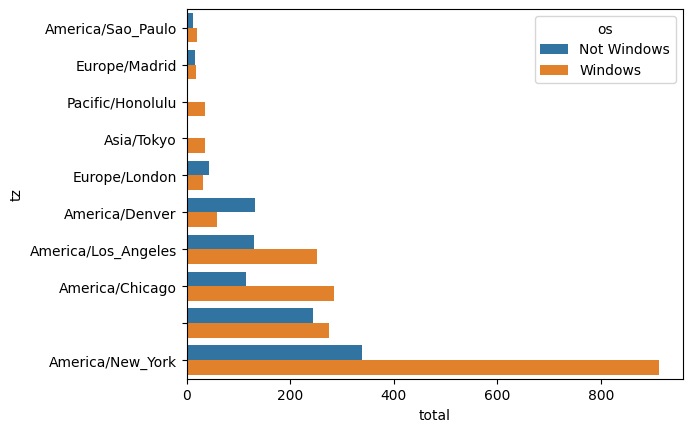

In [279]:
# Vẽ biểu đồ thanh ngang
sns.barplot(x="total", y="tz", hue="os", data=count_subset)

In [280]:
# Chuẩn hóa dữ liệu
def norm_total(group):
    group["normed_total"] = group["total"] / group["total"].sum()
    return group
results = count_subset.groupby("tz").apply(norm_total)

C:\Users\dtoan\AppData\Local\Temp\ipykernel_6640\2565097564.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = count_subset.groupby("tz").apply(norm_total)


<Axes: xlabel='normed_total', ylabel='tz'>

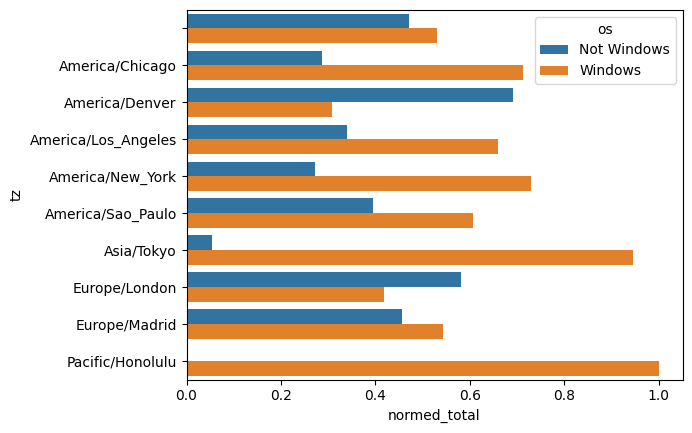

In [281]:
sns.barplot(x="normed_total", y="tz", hue="os", data=results)

<Axes: xlabel='normed_total', ylabel='tz'>

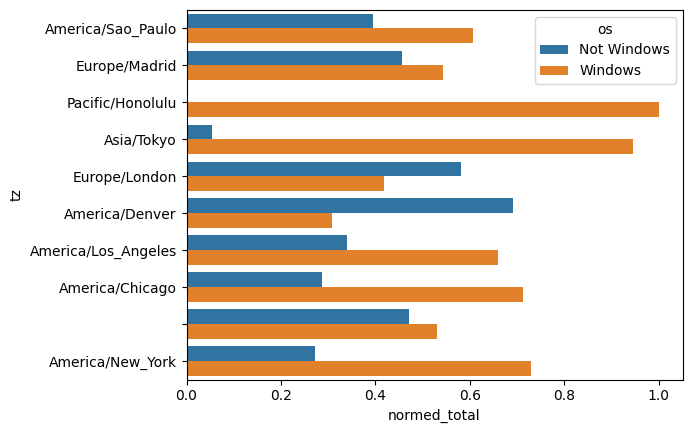

In [282]:
# Cách khác để chuẩn hóa dữ liệu
g = count_subset.groupby("tz")
results2 = count_subset["total"] / g["total"].transform("sum")
# xuất kết quả
# Kết quả chuẩn hóa là một Series, cần thêm vào DataFrame để vẽ với seaborn
count_subset["normed_total"] = results2
sns.barplot(x="normed_total", y="tz", hue="os", data=count_subset)

## 13.2 MovieLens 1M Dataset

In [283]:

unames = ["user_id", "gender", "age", "occupation", "zip"]  # đọc dữ liệu người dùng
users = pd.read_table("users.dat", sep="::", header=None, names=unames, engine="python")

rnames = ["user_id", "movie_id", "rating", "timestamp"]  # đọc dữ liệu đánh giá
ratings = pd.read_table("ratings.dat", sep="::", header=None, names=rnames, engine="python")

mnames = ["movie_id", "title", "genres"]  # đọc dữ liệu phim
movies = pd.read_table("movies.dat", sep="::", header=None, names=mnames, engine="python")

In [284]:
# hiển thị 5 giá trị đầu tiên của bảng users
users.head(5)

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [285]:
# hiển thị 5 giá trị đầu tiên của bảng ratings
ratings.head(5)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [286]:
# hiển thị 5 giá trị đầu tiên của bảng movies
movies.head(5)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [287]:
# hiển thị toàn bộ bảng ratings
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [288]:
# Kết hợp các bảng với nhau
data = pd.merge(pd.merge(ratings, users), movies)

In [289]:
# hiển thị
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


In [290]:
# hiển thị thông tin của một người dùng
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [291]:
# Tính điểm đánh giá trung bình cho mỗi phim theo giới tính
mean_ratings = data.pivot_table("rating", index="title", columns="gender", aggfunc="mean")

In [292]:
# hiển thị 5 giá trị đầu tiên
mean_ratings.head(5)

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [293]:
# Đếm số lượng đánh giá cho mỗi phim
ratings_by_title = data.groupby("title").size()

In [294]:
# hiển thị 5 giá trị đầu tiên
ratings_by_title.head()

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [295]:
# Lấy các phim có ít nhất 250 đánh giá
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [296]:
# hiển thị
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [297]:
# lọc mean_ratings chỉ giữ lại các phim có ít nhất 250 đánh giá
mean_ratings = mean_ratings.loc[active_titles]

In [298]:
# hiển thị
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [299]:
# Sắp xếp theo điểm đánh giá trung bình của nữ
top_female_ratings = mean_ratings.sort_values("F", ascending=False)

In [300]:
# hiển thị 5 giá trị đầu tiên
top_female_ratings.head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


### Measuring Rating Disagreement

In [301]:
# tính chênh lệch điểm đánh giá giữa nam và nữ
mean_ratings["diff"] = mean_ratings["M"] - mean_ratings["F"]

In [302]:
# sắp xếp theo chênh lệch điểm đánh giá
sorted_by_diff = mean_ratings.sort_values("diff")

In [303]:
# hiển thị 5 giá trị đầu tiên
sorted_by_diff.head()

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777


In [304]:
# hiển thị 5 giá trị cuối cùng
sorted_by_diff[::-1].head()

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787


In [305]:
# tính độ lệch chuẩn của điểm đánh giá theo tiêu đề phim
rating_std_by_title = data.groupby("title")["rating"].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]

In [306]:
# hiển thị 5 giá trị đầu tiên
rating_std_by_title.head()

title
'burbs, The (1989)                   1.107760
10 Things I Hate About You (1999)    0.989815
101 Dalmatians (1961)                0.982103
101 Dalmatians (1996)                1.098717
12 Angry Men (1957)                  0.812731
Name: rating, dtype: float64

In [307]:
# hiển thị 10 phim có độ lệch chuẩn điểm đánh giá cao nhất
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

In [308]:
# hiển thị 5 giá trị đầu tiên
movies["genres"].head()

0     Animation|Children's|Comedy
1    Adventure|Children's|Fantasy
2                  Comedy|Romance
3                    Comedy|Drama
4                          Comedy
Name: genres, dtype: object

In [309]:
# tách các thể loại phim
movies["genres"].head().str.split("|")

0     [Animation, Children's, Comedy]
1    [Adventure, Children's, Fantasy]
2                   [Comedy, Romance]
3                     [Comedy, Drama]
4                            [Comedy]
Name: genres, dtype: object

In [310]:
# thêm cột genre vào movies
movies["genre"] = movies.pop("genres").str.split("|")

In [311]:
# hiển thị 5 giá trị đầu tiên
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [312]:
# tách các thể loại phim thành các dòng riêng biệt
movies_exploded = movies.explode("genre")
# hiển thị 10 giá trị đầu tiên
movies_exploded[:10]

,movie_id,title,genre
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance
3,4,Waiting to Exhale (1995),Comedy
3,4,Waiting to Exhale (1995),Drama


In [313]:
# Kết hợp bảng movies_exploded với bảng ratings và users
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)
# hiển thị 5 giá trị đầu tiên
ratings_with_genre.iloc[0]

movie_id                     1
title         Toy Story (1995)
genre                Animation
user_id                      1
rating                       5
timestamp            978824268
gender                       F
age                          1
occupation                  10
zip                      48067
Name: 0, dtype: object

In [314]:
# Tính điểm đánh giá trung bình theo thể loại và độ tuổi
genre_ratings = (ratings_with_genre.groupby(["genre", "age"]) ["rating"].mean().unstack("age"))

In [315]:
# hiển thị 10 giá trị đầu tiên
genre_ratings[:10]

age,1,18,25,35,45,50,56
genre,,,,,,,
Action,3.506385,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709
Adventure,3.449975,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064
Animation,3.476113,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233
Children's,3.241642,3.294257,3.426873,3.518423,3.527593,3.556555,3.621822
Comedy,3.497491,3.460417,3.490385,3.561984,3.591789,3.646868,3.650949
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Fantasy,3.317647,3.353778,3.452484,3.482301,3.532468,3.581570,3.532700


## 13.5 2012 Federal Election Commission Database

In [316]:
#thêm dữ liệu từ file csv
fec = pd.read_csv("P00000001-ALL.csv", low_memory=False)

In [317]:
# hiển thị thông tin dataframe
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [318]:
# hiển thị một dòng dữ liệu
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                        50.0
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [319]:
# lấy các tên ứng cử viên duy nhất
unique_cands = fec["cand_nm"].unique()

In [320]:
# hiển thị các tên ứng cử viên duy nhất
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [321]:
# hiển thị tên ứng cử viên thứ 3
unique_cands[2]

'Obama, Barack'

In [322]:
# hiển thị tên ứng cử viên từ dòng 123456 đến 123460
parties = {"Bachmann, Michelle": "Republican",
"Cain, Herman": "Republican",
"Gingrich, Newt": "Republican",
"Huntsman, Jon": "Republican",
"Johnson, Gary Earl": "Republican",
"McCotter, Thaddeus G": "Republican",
"Obama, Barack": "Democrat",
"Paul, Ron": "Republican",
"Pawlenty, Timothy": "Republican",
"Perry, Rick": "Republican",
"Roemer, Charles E. 'Buddy' III": "Republican",
"Romney, Mitt": "Republican",
"Santorum, Rick": "Republican"}

In [323]:
# hiển thị tên ứng cử viên từ dòng 123456 đến 123460
fec["cand_nm"][123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [324]:
# ánh xạ tên ứng cử viên sang đảng phái
fec["cand_nm"][123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [325]:
# ánh xạ tên ứng cử viên sang đảng phái và thêm cột party vào fec
fec["party"] = fec["cand_nm"].map(parties)
# hiển thị số lượng ứng cử viên theo đảng phái
fec["party"].value_counts()

party
Democrat      593746
Republican    407985
Name: count, dtype: int64

In [326]:
# hiển thị số lượng đóng góp tích cực và tiêu cực
(fec["contb_receipt_amt"] > 0).value_counts()

contb_receipt_amt
True     991475
False     10256
Name: count, dtype: int64

In [327]:
# lọc các đóng góp tích cực
fec = fec[fec["contb_receipt_amt"] > 0]

In [328]:
# lọc các đóng góp của Obama và Romney
fec_mrbo = fec[fec["cand_nm"].isin(["Obama, Barack", "Romney, Mitt"])]

### Donation Statistics by Occupation and Employer

In [329]:
# Liệt kê 10 nghề nghiệp đóng góp nhiều nhất
fec["contbr_occupation"].value_counts()[:10]

contbr_occupation
RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: count, dtype: int64

In [330]:
# Ánh xạ các nghề nghiệp không rõ ràng thành "NOT PROVIDED"
occ_mapping = {
"INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
"INFORMATION REQUESTED" : "NOT PROVIDED",
"INFORMATION REQUESTED (BEST EFFORTS)" : "NOT PROVIDED",
"C.E.O.": "CEO"
}

In [331]:
# Hàm ánh xạ nghề nghiệp
def get_occ(x):
    # If no mapping provided, return x
    return occ_mapping.get(x, x)

In [332]:
# Áp dụng hàm get_occ để ánh xạ các nghề nghiệp
fec["contbr_occupation"] = fec["contbr_occupation"].map(get_occ)

In [333]:
# Ánh xạ các nhà tuyển dụng không rõ ràng thành "NOT PROVIDED"
emp_mapping = {
"INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
"INFORMATION REQUESTED" : "NOT PROVIDED",
"SELF" : "SELF-EMPLOYED",
"SELF EMPLOYED" : "SELF-EMPLOYED",
}

In [334]:
# Hàm ánh xạ nhà tuyển dụng
def get_emp(x):
    # If no mapping provided, return x
    return emp_mapping.get(x, x)

In [335]:
# Áp dụng hàm get_emp để ánh xạ các nhà tuyển dụng
fec["contbr_employer"] = fec["contbr_employer"].map(get_emp)

In [336]:
# Tạo bảng tổng hợp số tiền đóng góp theo nghề nghiệp và đảng phái
by_occupation = fec.pivot_table("contb_receipt_amt",index="contbr_occupation",columns="party", aggfunc="sum")

In [337]:
# Lấy các nghề nghiệp có tổng số tiền đóng góp lớn hơn 2 triệu
over_2mm = by_occupation[by_occupation.sum(axis="columns") > 2000000]

In [338]:
# hiển thị
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
CEO,2074974.79,4211040.52
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
EXECUTIVE,1355161.05,4138850.09
HOMEMAKER,4248875.80,13634275.78
INVESTOR,884133.00,2431768.92
LAWYER,3160478.87,391224.32
MANAGER,762883.22,1444532.37


<Axes: ylabel='contbr_occupation'>

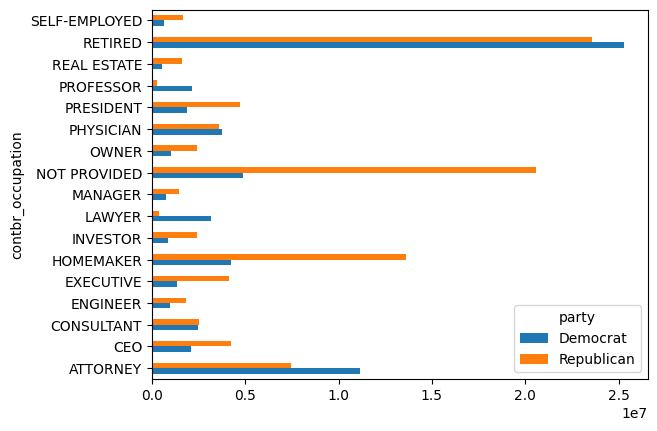

In [340]:
# hiển thị biểu đồ
over_2mm.plot(kind="barh")

In [ ]:
# Hàm lấy ra n giá trị đóng góp lớn nhất theo nhóm
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)["contb_receipt_amt"].sum()
    return totals.nlargest(n)

In [342]:
# Nhóm dữ liệu theo tên ứng cử viên
grouped = fec_mrbo.groupby("cand_nm")

In [343]:
# Áp dụng hàm get_top_amounts để lấy ra 7 nghề nghiệp đóng góp nhiều nhất cho mỗi ứng cử viên
grouped.apply(get_top_amounts, "contbr_occupation", n=7)

C:\Users\dtoan\AppData\Local\Temp\ipykernel_6640\1461339563.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped.apply(get_top_amounts, "contbr_occupation", n=7)


cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [344]:
# Áp dụng hàm get_top_amounts để lấy ra 10 nhà tuyển dụng đóng góp nhiều nhất cho mỗi ứng cử viên
grouped.apply(get_top_amounts, "contbr_employer", n=10)

C:\Users\dtoan\AppData\Local\Temp\ipykernel_6640\1505909932.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped.apply(get_top_amounts, "contbr_employer", n=10)


cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

### Bucketing Donation Amounts

In [346]:
# Tạo mảng các khoảng giá trị (bins) để phân nhóm dữ liệu theo mức tiền
bins = np.array([0, 1, 10, 100, 1000, 10000,100_000, 1_000_000, 10_000_000])

In [347]:
# Phân nhóm dữ liệu theo mức tiền
labels = pd.cut(fec_mrbo["contb_receipt_amt"], bins)

In [348]:
# hiển thị
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64, right]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [349]:
# Nhóm dữ liệu theo tên ứng cử viên và mức tiền
grouped = fec_mrbo.groupby(["cand_nm", labels])

C:\Users\dtoan\AppData\Local\Temp\ipykernel_6640\4098112994.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = fec_mrbo.groupby(["cand_nm", labels])


In [350]:
# hiển thị kích thước của mỗi nhóm
grouped.size().unstack(level=0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [351]:
# Tính tổng số tiền đóng góp cho mỗi nhóm
bucket_sums = grouped["contb_receipt_amt"].sum().unstack(level=0)

In [352]:
# chuẩn hóa dữ liệu
normed_sums = bucket_sums.div(bucket_sums.sum(axis="columns"),axis="index")

In [353]:
# hiển thị dữ liệu đã chuẩn hóa
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,0.000000
"(1000000, 10000000]",1.000000,0.000000


<Axes: ylabel='contb_receipt_amt'>

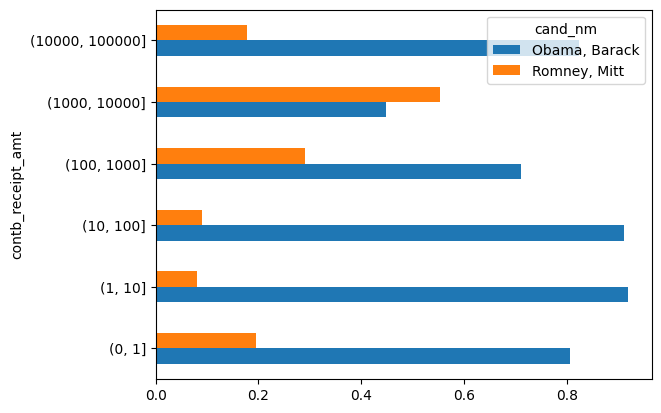

In [354]:
# hiển thị biểu đồ
normed_sums[:-2].plot(kind="barh")

### Donation Statistics by State

In [355]:
# Nhóm dữ liệu theo tên ứng cử viên và mức tiền
grouped = fec_mrbo.groupby(["cand_nm", "contbr_st"])

In [356]:
# hiển thị kích thước của mỗi nhóm
totals = grouped["contb_receipt_amt"].sum().unstack(level=0).fillna(0)

In [357]:
# Lọc các bang có tổng số tiền đóng góp lớn hơn 100000
totals = totals[totals.sum(axis="columns") > 100000]

In [358]:
# hiển thị 10 giá trị đầu tiên
totals.head(10)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [ ]:
# Tính tỷ lệ phần trăm của từng giá trị trong hàng so với tổng hàng
percent = totals.div(totals.sum(axis="columns"), axis="index")

In [360]:
# hiển thị 10 giá trị đầu tiên
percent.head(10)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
